In [65]:
# 在excel中输入数据，导入到程序中
import pandas as pd
sample = pd.read_excel('data.xlsx')

In [100]:
# 创建数据框用于保存参数
data = pd.DataFrame(data = None, columns = ['threshold','precision','TPR','FPR'])

In [101]:
# 根据样本信息计算参数
for index, row in sample.iterrows():
    threshold = row['Score']

    TP = len(sample[(sample['Score'] >= threshold) & (sample['Class'] == 'p')])
    FP = len(sample[(sample['Score'] >= threshold) & (sample['Class'] == 'n')])
    FN = len(sample[(sample['Score'] <  threshold) & (sample['Class'] == 'p')])
    TN = len(sample[(sample['Score'] <  threshold) & (sample['Class'] == 'n')])

    precision = TP/(TP + FP)
    TPR = TP/(TP + FN)
    FPR = FP/(FP + TN)
    data = data.append({'threshold':threshold, 'precision':precision, 'TPR':TPR, 'FPR':FPR}, ignore_index=True)

In [102]:
data

,threshold,precision,TPR,FPR
0,0.900,1.000000,0.1,0.0
1,0.800,1.000000,0.2,0.0
2,0.700,0.666667,0.2,0.1
3,0.600,0.750000,0.3,0.1
4,0.550,0.800000,0.4,0.1
5,0.540,0.833333,0.5,0.1
6,0.530,0.714286,0.5,0.2
7,0.520,0.625000,0.5,0.3
8,0.510,0.666667,0.6,0.3
9,0.505,0.600000,0.6,0.4


In [73]:
#导入画图用的模块
%matplotlib inline

import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")

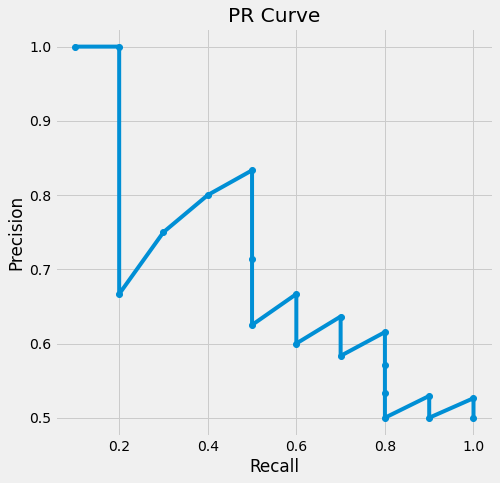

In [105]:
# 根据参数画出PR曲线
Precision = data['precision']
Recall = TPR = data['TPR']

fig, ax = plt.subplots(figsize=(7, 7))
ax.set(title="PR Curve",
       xlabel="Recall",
       ylabel="Precision")
ax.plot(Recall, Precision, "-o")

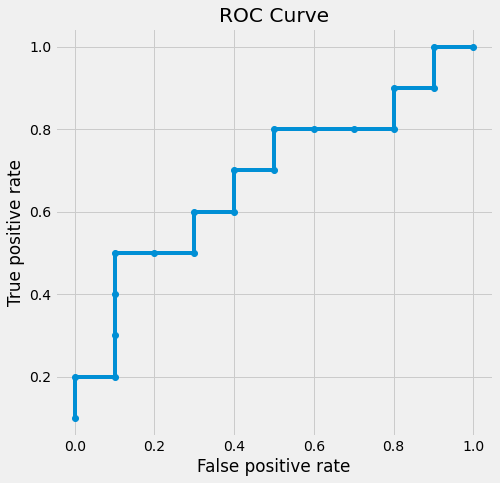

In [104]:
# 根据参数画出ROC曲线
FPR = data['FPR']
TPR = data['TPR']

fig, ax = plt.subplots(figsize=(7, 7))
ax.set(title="ROC Curve",
       xlabel="False positive rate",
       ylabel="True positive rate")
ax.plot(FPR, TPR, "-o")

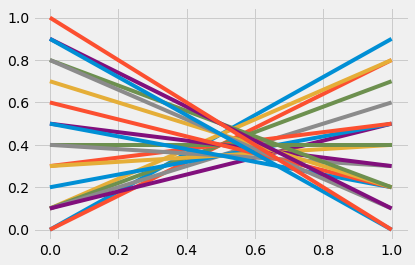

In [108]:
# 根据参数直接画出代价曲线
plt.figure()

for index, row in data.iterrows():
    # 计算参数
    FPR = row['FPR']
    FNR = 1-row['TPR']
    plt.plot([0,1], [FPR,FNR])

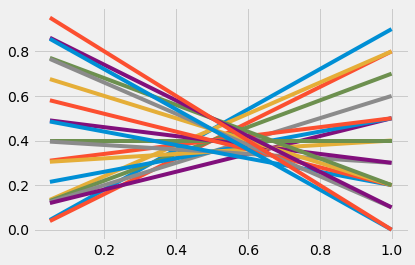

In [119]:
# 根据参数利用cost画出代价曲线
plt.figure()
cost01 = 5
cost10 = 2
for index, row in data.iterrows():
    # 计算参数
    FPR = row['FPR']
    FNR = 1 - row['TPR']

    # 生成线段点
    p = []
    i = 0
    while i < 1.0:
        i += 0.02
        p.append(i)

    # 计算正例概率代价和归一化代价
    p_cost = [p * cost01 / (p * cost01 + (1 - p) * cost10) for p in p]
    cost_norm = [FNR * p_cost + FPR * (1 - p_cost) for p_cost in p_cost]
    plt.plot(p_cost, cost_norm)